<a href="https://colab.research.google.com/github/arrafiiqbal/Data-Portofolio/blob/main/Car%20Price%20Prediction%20and%20Analysis/Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
sheet_id = "15OSFvexMsTp0z2I9nppIYFR-l79lVfRq2-15Mb6k_Jg"
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv"

original_dataset = pd.read_csv(csv_url)

In [3]:
original_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


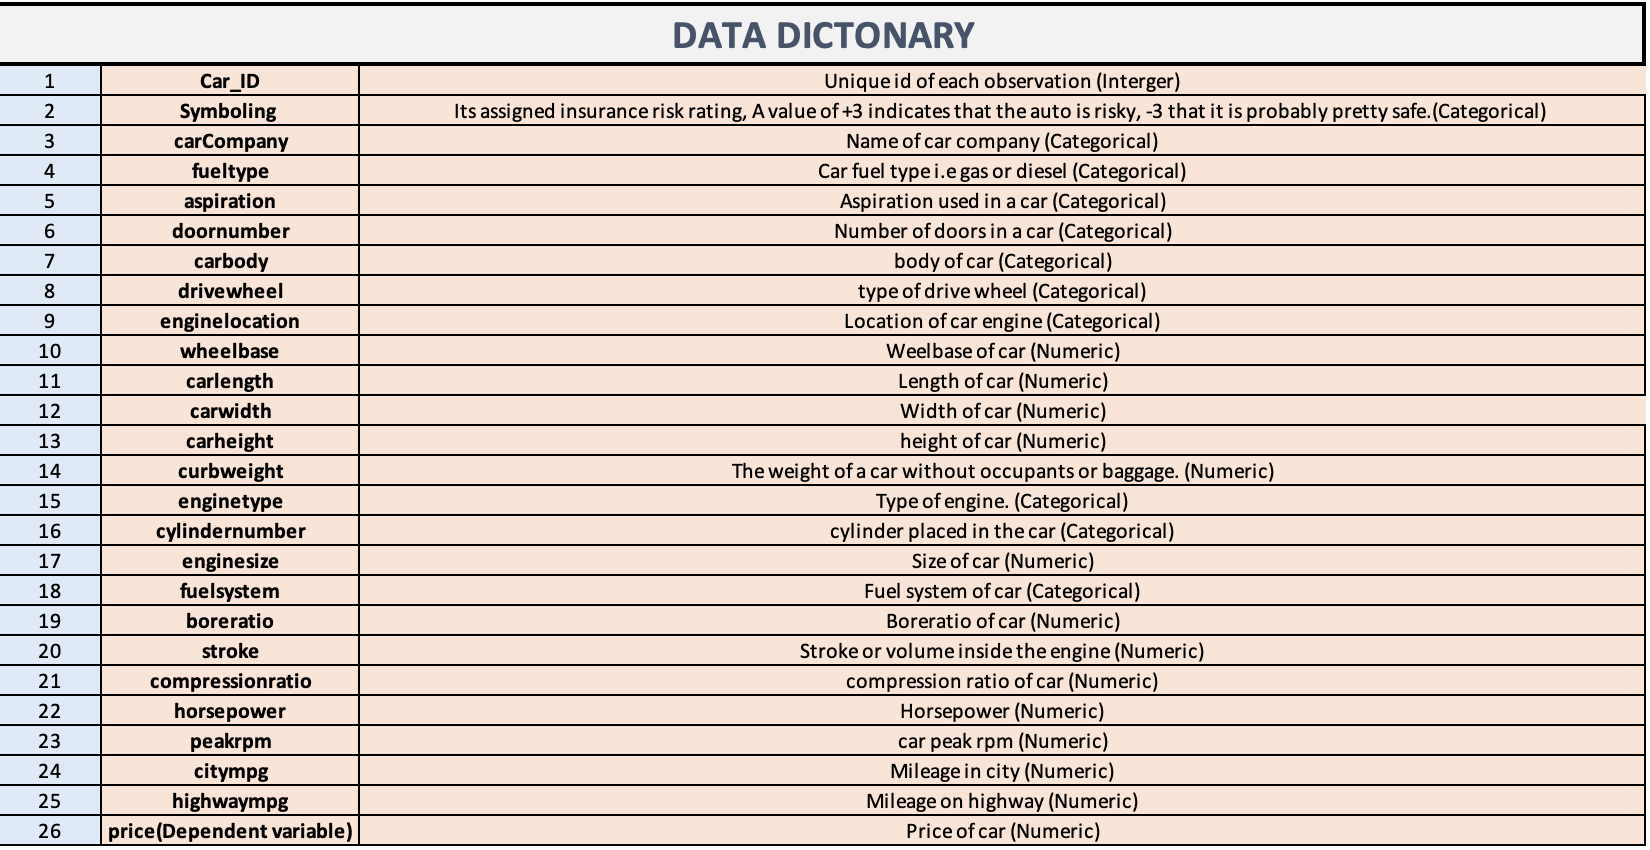

In [4]:
# Brief dataframe checking
summary_df = pd.DataFrame({
    "Missing Values": original_dataset.isnull().sum(),
    "Duplicated Rows": original_dataset.duplicated().sum(),
    "Data Types": original_dataset.dtypes.astype(str),
    "Unique Values" : original_dataset.nunique(),
    "Total rows" : original_dataset.drop_duplicates().shape[0]
})

from IPython.core.display import display
display(summary_df)

,Missing Values,Duplicated Rows,Data Types,Unique Values,Total rows
car_ID,0,0,int64,205,205
symboling,0,0,int64,6,205
CarName,0,0,object,147,205
fueltype,0,0,object,2,205
aspiration,0,0,object,2,205
doornumber,0,0,object,2,205
carbody,0,0,object,5,205
drivewheel,0,0,object,3,205
enginelocation,0,0,object,2,205
wheelbase,0,0,float64,53,205


In [5]:
# Conditioning the dataset
# remove ID's and others alike
columns_to_drop = ["car_ID", "CarName"]
df = original_dataset.drop(columns=columns_to_drop)
df['symboling'] = df['symboling'].astype(str)

In [6]:
#some engineered feature related to car performance
df["Performance_Index"] = df["horsepower"] / df["curbweight"]
df["Engine_Efficiency"] = df["horsepower"] / df["enginesize"]
df["Size_Index"] = df["carlength"] * df["carwidth"] * df["carheight"]
df["Fuel_Efficiency"] = (df["citympg"] + df["highwaympg"]) / 2
df["Load_Factor"] = df["curbweight"] / df["enginesize"]
df["Power_Density"] = df["horsepower"] / (df["carlength"] * df["carwidth"])

In [7]:
# List of original features to drop
drop_columns = [
    "horsepower", "curbweight", "enginesize",
    "carlength", "carwidth", "carheight",
    "citympg", "highwaympg"
]

# Drop the redundant columns
df = df.drop(columns=drop_columns)

# Display first few rows to verify
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,enginetype,cylindernumber,...,stroke,compressionratio,peakrpm,price,Performance_Index,Engine_Efficiency,Size_Index,Fuel_Efficiency,Load_Factor,Power_Density
0,3,gas,std,two,convertible,rwd,front,88.6,dohc,four,...,2.68,9.0,5000,13495.0,0.043564,0.853846,528019.904,24.0,19.600000,0.010259
1,3,gas,std,two,convertible,rwd,front,88.6,dohc,four,...,2.68,9.0,5000,16500.0,0.043564,0.853846,528019.904,24.0,19.600000,0.010259
2,1,gas,std,two,hatchback,rwd,front,94.5,ohcv,six,...,3.47,9.0,5000,16500.0,0.054552,1.013158,587592.640,22.5,18.572368,0.013733
3,2,gas,std,four,sedan,fwd,front,99.8,ohc,four,...,3.40,10.0,5500,13950.0,0.043646,0.935780,634816.956,27.0,21.440367,0.008725
4,2,gas,std,four,sedan,4wd,front,99.4,ohc,five,...,3.40,8.0,5500,17450.0,0.040722,0.845588,636734.832,20.0,20.764706,0.009807


In [8]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

df_num = df[num_cols]
df_cat = df[cat_cols]

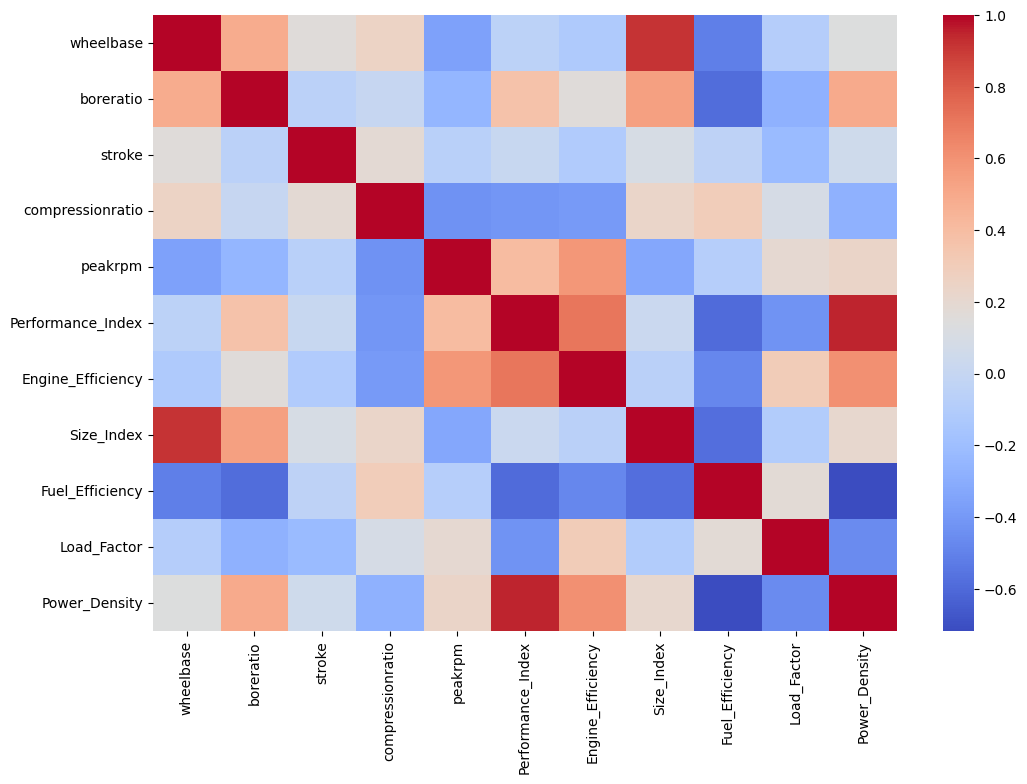

In [9]:
# check feature correlation to remove redundant high correlated features
# Compute correlation matrix
corr_matrix = df_num.drop(columns=["price"]).corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.show()

In [10]:
# Determine a dynamic threshold using statistical analysis
correlation_values = corr_matrix.abs().unstack().sort_values(ascending=False)

# Exclude diagonal values (self-correlation of 1.0)
correlation_values = correlation_values[correlation_values != 1.0]

# Use percentile-based threshold (e.g., 90th percentile of correlation values)
threshold = np.percentile(correlation_values, 90)

print(f"Optimal correlation threshold determined: {threshold:.2f}")

Optimal correlation threshold determined: 0.60


In [11]:
# Identify pairs of highly correlated features
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns
                   if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > threshold]

# Create a set of features to remove (keeping one from each highly correlated pair)
features_to_remove = set()
for col1, col2 in high_corr_pairs:
    if col1 not in features_to_remove and col2 not in features_to_remove:
        features_to_remove.add(col2)  # Arbitrarily remove the second feature

print("Features to remove due to high correlation:", features_to_remove)


Features to remove due to high correlation: {'Power_Density', 'Engine_Efficiency', 'Size_Index'}


In [12]:
# Drop the selected features
df_num = df_num.drop(columns=features_to_remove)

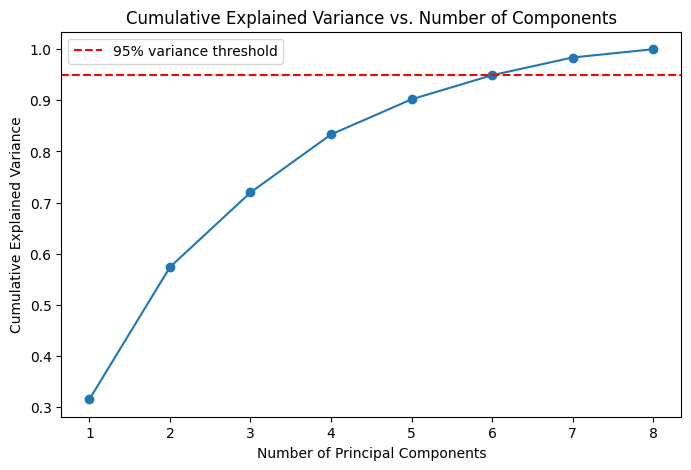

Optimal number of components based on 95% variance: 7


In [13]:
# Perform PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num.drop(columns='price'))

pca = PCA()
pca.fit(df_scaled)  # Assuming df contains only numerical features

# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components required to reach 95% variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker="o", linestyle="-")
plt.axhline(y=0.95, color="r", linestyle="--", label="95% variance threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs. Number of Components")
plt.legend()
plt.show()

print(f"Optimal number of components based on 95% variance: {optimal_components}")

In [14]:
# Apply PCA with optimal number of components (n=7)
pca = PCA(n_components=optimal_components)
df_pca = pca.fit_transform(df_scaled)

# Convert PCA result to a DataFrame
pca_columns = [f"PC{i+1}" for i in range(7)]
df_pca = pd.DataFrame(df_pca, columns=pca_columns)

# Concatenate with categorical features
df_final = pd.concat([pd.concat([df_pca, df_cat.reset_index(drop=True)], axis=1), df['price'].reset_index(drop=True)], axis=1)

# Print explained variance ratio
print("Explained Variance Ratio per Component:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", sum(pca.explained_variance_ratio_))

# Final dataset after PCA transformation
df_final.head()

Explained Variance Ratio per Component: [0.31552495 0.25838178 0.14598161 0.1134022  0.06872806 0.0471845
 0.03458833]
Cumulative Explained Variance: 0.9837914265313296


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,-0.297723,1.114970,-0.826434,-1.911622,0.469390,0.485357,-0.651946,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0
1,-0.297723,1.114970,-0.826434,-1.911622,0.469390,0.485357,-0.651946,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0
2,-0.107738,1.222099,1.676670,0.261218,-0.328148,-1.000058,-2.211093,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0
3,-0.045744,0.560185,0.301805,0.864556,0.166417,-0.365632,-0.021111,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0
4,-0.631575,0.750242,0.139594,0.995162,-0.439262,-0.375040,-0.297259,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0


In [15]:
selected_cols = df_num.drop(columns=["price"]).columns.tolist()

In [16]:
# Create a DataFrame of PCA loadings (feature importance per component)
loadings = pd.DataFrame(pca.components_, columns=selected_cols, index=[f"PC{i+1}" for i in range(7)])

# Display PCA loadings
print(loadings)

     wheelbase  boreratio    stroke  compressionratio   peakrpm  \
PC1  -0.314593  -0.481177 -0.055822          0.196392 -0.012149   
PC2  -0.453832  -0.222997 -0.190960         -0.508571  0.570729   
PC3  -0.229848  -0.226520  0.682014          0.071459 -0.013581   
PC4   0.322648  -0.181192  0.589075          0.075020  0.415927   
PC5  -0.204495   0.223845 -0.138891          0.782502  0.336095   
PC6  -0.538193   0.580347  0.354800         -0.162201 -0.256579   
PC7   0.249834   0.496656  0.036839         -0.152451  0.524377   

     Performance_Index  Fuel_Efficiency  Load_Factor  
PC1          -0.467735         0.553484     0.320229  
PC2           0.345629        -0.020634     0.059843  
PC3           0.171678         0.204870    -0.594962  
PC4          -0.048977        -0.269864     0.512064  
PC5           0.389820         0.086898     0.063282  
PC6          -0.016192         0.046253     0.391304  
PC7          -0.356162         0.466888    -0.215663  


In [17]:
# Show the top 3 contributing features per principal component
top_features_per_pc = loadings.abs().idxmax(axis=1)
print(top_features_per_pc)

PC1     Fuel_Efficiency
PC2             peakrpm
PC3              stroke
PC4              stroke
PC5    compressionratio
PC6           boreratio
PC7             peakrpm
dtype: object


In [18]:
from collections import Counter

# Count feature importance across all PCs
feature_counts = Counter(top_features_per_pc.values)

# Sort features by importance
important_features = sorted(feature_counts, key=feature_counts.get, reverse=True)

print("Most Important Features Used in PCA:", important_features[:7])

Most Important Features Used in PCA: ['peakrpm', 'stroke', 'Fuel_Efficiency', 'compressionratio', 'boreratio']


In [19]:
col_final = important_features + cat_cols + ['price']
print(col_final)

['peakrpm', 'stroke', 'Fuel_Efficiency', 'compressionratio', 'boreratio', 'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'price']


In [20]:
df_final_ml = df[col_final]
df_final_ml.head()

,peakrpm,stroke,Fuel_Efficiency,compressionratio,boreratio,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,5000,2.68,24.0,9.0,3.47,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0
1,5000,2.68,24.0,9.0,3.47,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0
2,5000,3.47,22.5,9.0,2.68,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0
3,5500,3.40,27.0,10.0,3.19,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0
4,5500,3.40,20.0,8.0,3.19,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0


In [21]:
# differentiate between ordinal and nominal features
ordinal_features = ['symboling']
nominal_features = list(set(cat_cols) - set(ordinal_features))

#recheck
df_final_ml.dtypes

,0
peakrpm,int64
stroke,float64
Fuel_Efficiency,float64
compressionratio,float64
boreratio,float64
symboling,object
fueltype,object
aspiration,object
doornumber,object
carbody,object


In [22]:
# Define target variable
y = df_final_ml['price']

# Define feature set (exclude target variable)
X = df_final_ml.drop(columns=['price'])

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (164, 15)
Testing data shape: (41, 15)


In [23]:
# 🔹 Apply Label Encoding to Ordinal Features
# 🔹 Apply Label Encoding to Ordinal Features
for col in ordinal_features:
    le = LabelEncoder()

    # Fit on all unique values from both train & test
    le.fit(pd.concat([X_train[col], X_test[col]], axis=0))

    # Transform train and test data
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [24]:
# Apply One-Hot Encoding only to nominal features
preprocessor = ColumnTransformer(
    transformers=[
        ("nominal", OneHotEncoder(handle_unknown="ignore"), nominal_features),  # ✅ OHE applied only to nominal
        ("scale", StandardScaler(), X.select_dtypes(include=["number"]).columns.tolist())  # Standardize numerical features
    ],
    remainder="passthrough"  # Keep all other columns as they are
)

In [25]:
# Transform training and testing data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Get the feature names after encoding
feature_names = preprocessor.get_feature_names_out()

print("Encoded Training Data Shape:", X_train_encoded.shape)

Encoded Training Data Shape: (164, 43)


In [26]:
# Initialize and train model
regressor = LinearRegression()
regressor.fit(X_train_encoded, y_train)

# Get coefficients and feature names
coefficients = regressor.coef_

# Make predictions
y_pred = regressor.predict(X_test_encoded)

In [27]:
# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2231.76
Root Mean Squared Error (RMSE): 3405.44
R² Score: 0.85


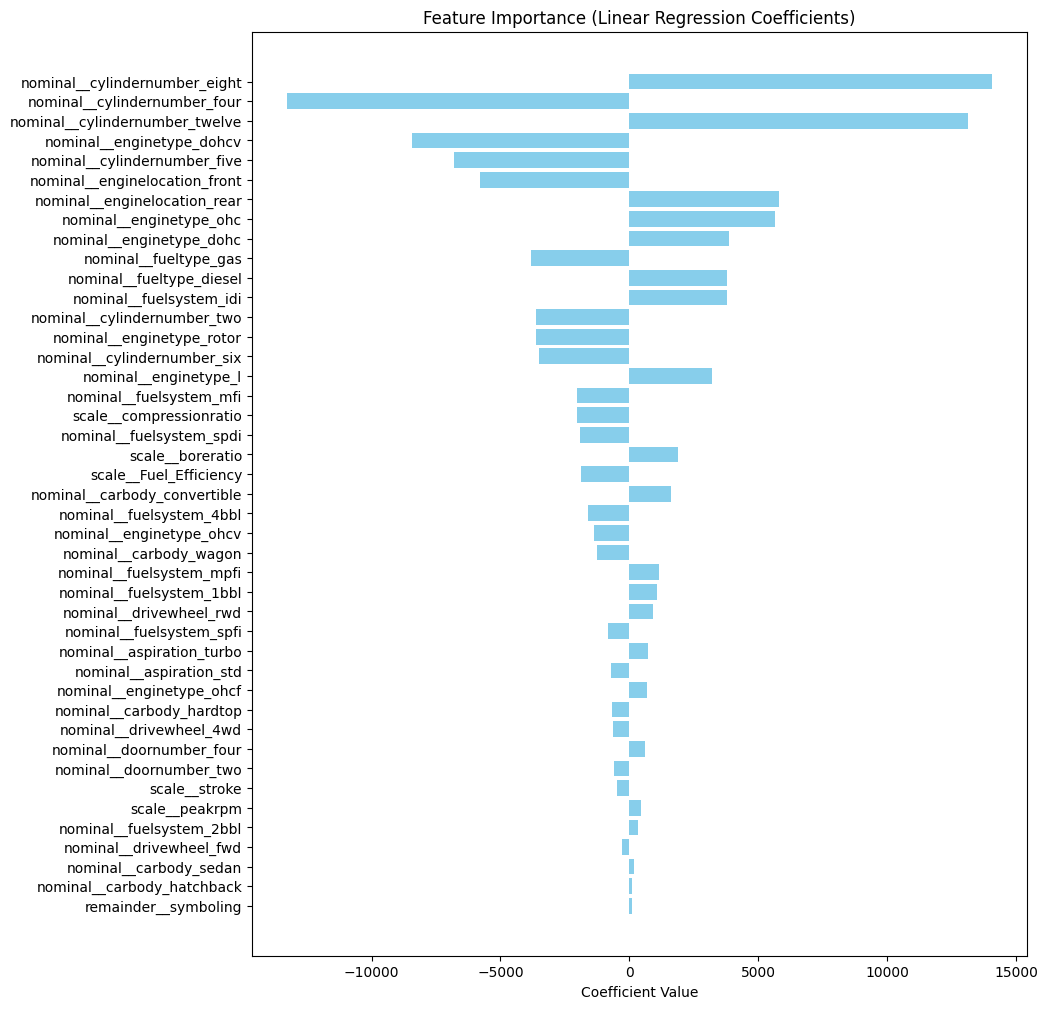

In [31]:
# Combine coefficients and feature names into a DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort features by their absolute value (magnitude) of coefficients
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the most important features
plt.figure(figsize=(10, 12))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.gca().invert_yaxis()  # Reverse order for better readability
plt.show()

In [29]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
15,30760.000,28181.832556,2578.167444
9,17859.167,20625.289179,-2766.122179
100,9549.000,10326.131136,-777.131136
132,11850.000,13680.811012,-1830.811012
68,28248.000,24860.306630,3387.693370
95,7799.000,6640.039899,1158.960101
159,7788.000,9451.136098,-1663.136098
162,9258.000,9227.495365,30.504635
147,10198.000,8544.531918,1653.468082
182,7775.000,6909.754113,865.245887
